In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('banking.csv')

# Display the first few rows
print(df.head())

# Display basic information about the dataset
print(df.info())

   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4   

## Encode categorical variables

In [3]:
# Encode binary categorical variables
df['default'] = df['default'].map({'no': 0, 'yes': 1, 'unknown': 2})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1, 'unknown': 2})
df['loan'] = df['loan'].map({'no': 0, 'yes': 1, 'unknown': 2})

# One-hot encode non-binary categorical variables
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

print(df_encoded.head())
print(df_encoded.columns)

   age  default  housing  loan  duration  campaign  pdays  previous  \
0   44        2        1     0       210         1    999         0   
1   53        0        0     0       138         1    999         0   
2   28        0        1     0       339         3      6         2   
3   39        0        0     0       185         2    999         0   
4   55        0        1     0       137         1      3         1   

   emp_var_rate  cons_price_idx  ...  month_oct  month_sep  day_of_week_fri  \
0           1.4          93.444  ...      False      False            False   
1          -0.1          93.200  ...      False      False             True   
2          -1.7          94.055  ...      False      False            False   
3          -1.8          93.075  ...      False      False             True   
4          -2.9          92.201  ...      False      False             True   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0            False       

## Scale numerical features

In [4]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding the target variable 'y')
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('y')

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print(df_encoded.head())

        age   default   housing      loan  duration  campaign     pdays  \
0  0.381527  1.946935  0.790990 -0.438089 -0.186230 -0.565922  0.195414   
1  1.245157 -0.513684 -1.056746 -0.438089 -0.463926 -0.565922  0.195414   
2 -1.153816 -0.513684  0.790990 -0.438089  0.311309  0.156105 -5.117342   
3 -0.098268 -0.513684 -1.056746 -0.438089 -0.282652 -0.204909  0.195414   
4  1.437075 -0.513684  0.790990 -0.438089 -0.467783 -0.565922 -5.133393   

   previous  emp_var_rate  cons_price_idx  ...  month_oct  month_sep  \
0 -0.349494      0.839061       -0.227465  ...      False      False   
1 -0.349494     -0.115781       -0.649003  ...      False      False   
2  3.691766     -1.134279        0.828107  ...      False      False   
3 -0.349494     -1.197935       -0.864955  ...      False      False   
4  1.671136     -1.898153       -2.374889  ...      False      False   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0            False            False        

## Visualize data

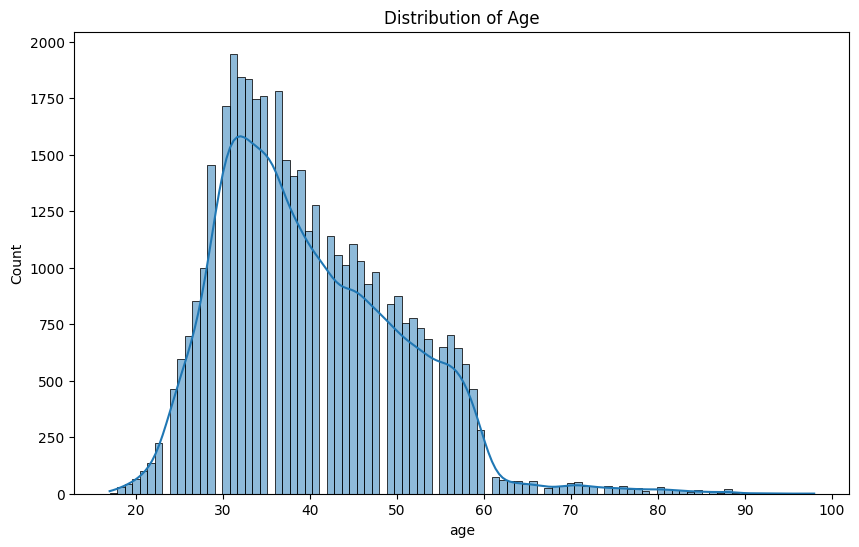

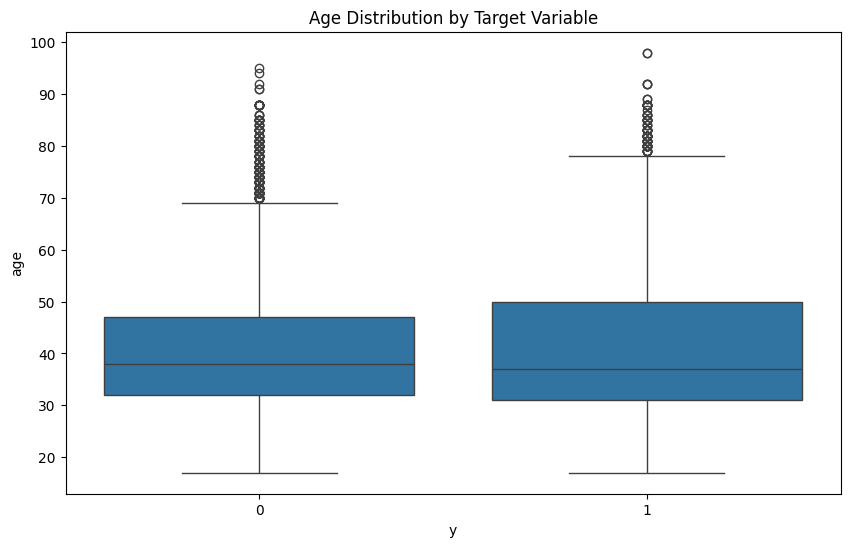

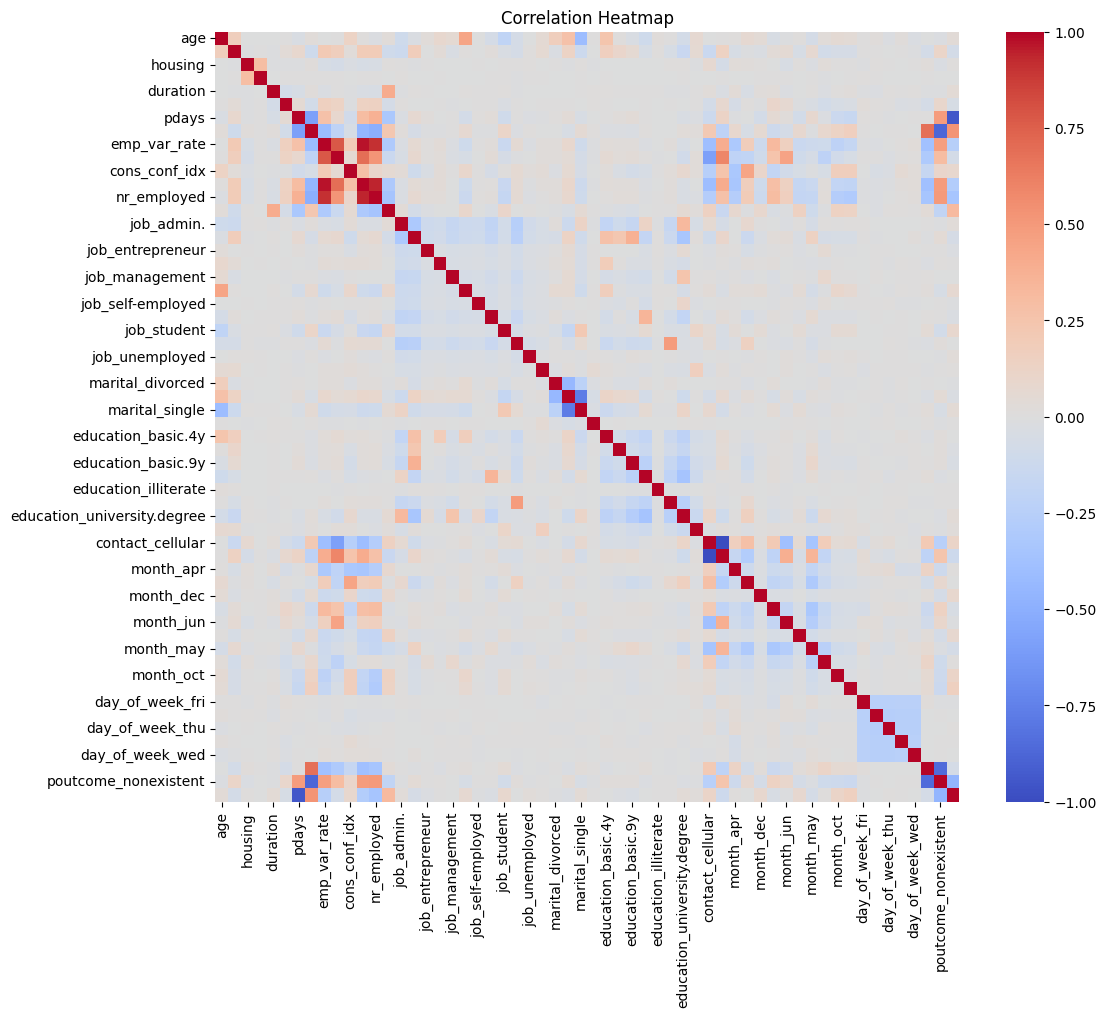

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Box plot of age by target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age Distribution by Target Variable')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature importance using Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Create and fit the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Select important features
selector = SelectFromModel(clf, prefit=True)
feature_idx = selector.get_support()
feature_names = X.columns[feature_idx]

print("Most important features:")
for feature in feature_names:
    print(feature)

Most important features:
age
housing
duration
campaign
pdays
emp_var_rate
cons_price_idx
cons_conf_idx
euribor3m
nr_employed
poutcome_success


## Apply PCA

Number of components: 25
Explained variance ratio: [0.23762601 0.08274459 0.07344962 0.06970117 0.06113804 0.05961371
 0.05207748 0.04553216 0.04133598 0.03799361 0.02664128 0.02132687
 0.01676032 0.01536512 0.01455638 0.01296135 0.01185977 0.01146076
 0.0112265  0.01103928 0.01017352 0.00808945 0.00756718 0.00691503
 0.00659857]


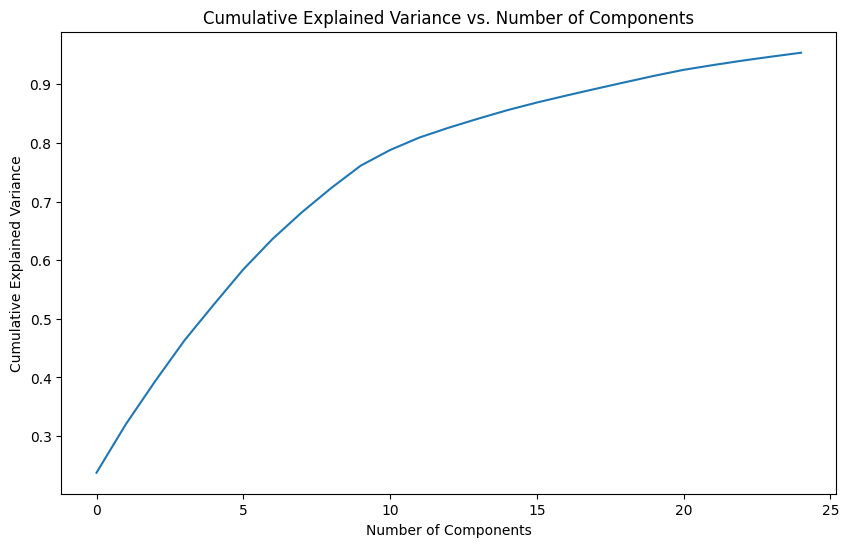

In [9]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X)

print(f"Number of components: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

## Identify significant features

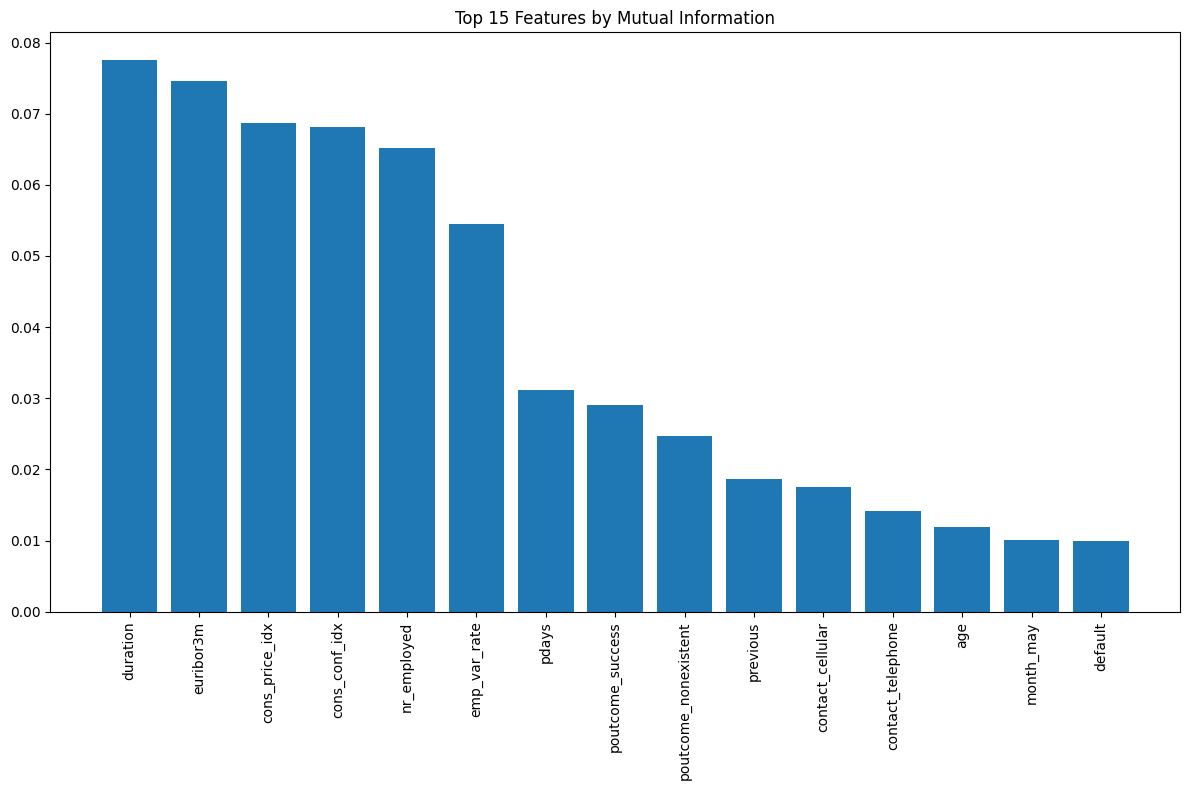

                 Feature  Mutual Information
4               duration            0.077551
11             euribor3m            0.074551
9         cons_price_idx            0.068702
10         cons_conf_idx            0.068116
12           nr_employed            0.065111
8           emp_var_rate            0.054490
6                  pdays            0.031181
56      poutcome_success            0.029106
55  poutcome_nonexistent            0.024737
7               previous            0.018669
37      contact_cellular            0.017508
38     contact_telephone            0.014128
0                    age            0.011962
45             month_may            0.010116
1                default            0.009884


In [10]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)

# Create a dataframe of features and their mutual information scores
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values('Mutual Information', ascending=False)

# Plot mutual information scores
plt.figure(figsize=(12, 8))
plt.bar(mi_df['Feature'][:15], mi_df['Mutual Information'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 Features by Mutual Information')
plt.tight_layout()
plt.show()

print(mi_df.head(15))

## Apply SVM and Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# Evaluation
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print(classification_report(y_test, svm_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))

SVM Results:
Accuracy: 0.9067734887108522
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.65      0.41      0.50       943

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Confusion Matrix:
[[7081  214]
 [ 554  389]]

Logistic Regression Results:
Accuracy: 0.9082301529497451
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.65      0.44      0.52       943

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Confusion Matrix:
[[7070  225]
 [ 531  412]]


## Compare SVM and LR

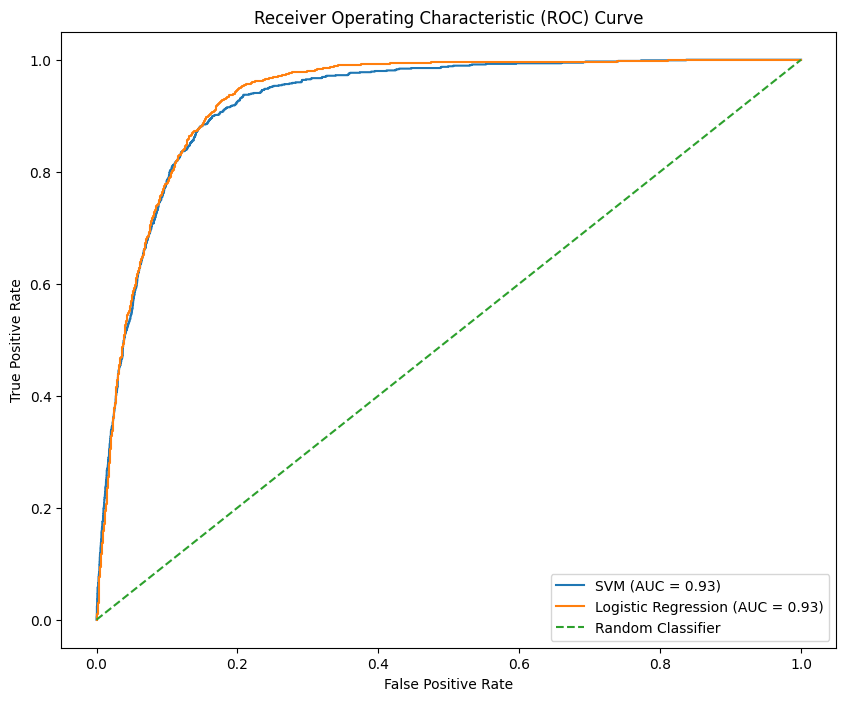

In [12]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm.decision_function(X_test_scaled))
svm_auc = auc(svm_fpr, svm_tpr)

# Calculate ROC curve and AUC for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()